# Chapter 1. The Machine Learning Landscape

## What is Machine Learning?

Machine Learning is the science of programming computers so they can learn from data.

A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E. -- Tom Mitchell, 1997.

Example: spam filter
Task T: to flag spam for new emails
Experience E: existing emails with labels (either spam or non-spam)
Performance measure P: ratio of correctly classified emails

Non-example: the collection of Wikipedia pages

## Why Use Machine Learning?

Traditional approach for spam filter:
1. Choose features of spam emails manually: "4U", "credit card", "free", "amazing"
2. Write an program to detect exactly the features you chose
3. Test the program and modify the features until satisfactory

Drawbacks: 
1. A large amount of features are needed - hard to maintain
2. Spammers may change their writing to avoid explicit rules: change "4U" to "For U".
3. For some complex problems, manually-engineered features are not good enough: hand-written digits

Machine Learning models:
1. Automatically learns which words and phrases are good predictors of spam. 
2. Since the program is not a stack of explicit rules, it is much shorter, easier to maintain, and most likely more accurate.
3. With new training data, the Machine Learning model can update automatically to capture new indicators of spam emails.

What Machine Learning is great for:
1. Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
2. Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
3. Fluctuating environments: a Machine Learning system can adapt to new data.
4. Large amount of data: With Machine Learning, computers process big data faster than human.


## Various Types of Machine Learning
- Supervised vs. Unsupervised Learning
- Semisupervised, reinforcement, transfer, adverseral learning...
- Online learning
- Instance based vs. model based learning

## Challenges of Machine Learning
- Insufficient quantity of training data
- Non-representative training data
- Irrelevant features

## Two Machine Learning Guidelines
- No Free Lunch Theorem
- Curse of Dimensionality

## A Machine Learning Example: Does money make people happier?
Suppose you want to know if money makes people happy, so you download the Better Life Index data from the OECD's website:

http://stats.oecd.org/index.aspx?DataSetCode=BLI

as well as stats about GDP per capita from the IMF's website:

https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD

Download these files and save as BLI.csv and GDP.csv

We would like to model the correlation between BLI and GDP.

In [4]:
import os
cur_path = os.getcwd()
os.listdir(cur_path)

['.DS_Store',
 'Homework2.ipynb',
 '.ipynb_checkpoints',
 'data',
 'Homework1.ipynb']

In [9]:
datapath = cur_path + '/data/'
os.listdir(datapath)


['BLI_06022019212206324.csv', 'API_NY']

In [8]:
import pandas as pd
pd.__version__

'0.23.0'

In [10]:
# use a data frame to store values from BLI.csv
bli = pd.read_csv(datapath + 'BLI.csv')


In [11]:
bli.head().T

,0,1,2,3,4
LOCATION,AUS,AUT,BEL,CAN,CZE
Country,Australia,Austria,Belgium,Canada,Czech Republic
INDICATOR,JE_LMIS,JE_LMIS,JE_LMIS,JE_LMIS,JE_LMIS
Indicator,Labour market insecurity,Labour market insecurity,Labour market insecurity,Labour market insecurity,Labour market insecurity
MEASURE,L,L,L,L,L
Measure,Value,Value,Value,Value,Value
INEQUALITY,TOT,TOT,TOT,TOT,TOT
Inequality,Total,Total,Total,Total,Total
Unit Code,PC,PC,PC,PC,PC
Unit,Percentage,Percentage,Percentage,Percentage,Percentage


In [14]:
bli.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.0,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,17.4,NaN,NaN


In [15]:
bli.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [13]:
bli.dtypes

LOCATION                  object
Country                   object
INDICATOR                 object
Indicator                 object
MEASURE                   object
Measure                   object
INEQUALITY                object
Inequality                object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

In [16]:
bli['PowerCode Code'] = bli['PowerCode Code'].astype('int64')

In [17]:
#look at the first feature LOCATION
bli['LOCATION'].value_counts()

CHE     88
CZE     88
NZL     88
SVK     88
PRT     88
LUX     88
GRC     88
MEX     88
HUN     88
KOR     88
ITA     88
JPN     88
FIN     88
FRA     88
RUS     88
ZAF     88
LVA     88
POL     88
TUR     88
IRL     88
GBR     88
CHL     88
EST     88
NOR     88
ISL     88
CAN     87
AUT     87
AUS     87
DEU     87
SWE     87
ESP     87
BEL     86
ISR     86
USA     86
NLD     86
SVN     86
DNK     86
BRA     86
OECD    74
Name: LOCATION, dtype: int64

In [19]:
bli['Indicator'].value_counts()

Long-term unemployment rate                          195
Personal earnings                                    195
Voter turnout                                        195
Student skills                                       195
Self-reported health                                 195
Employment rate                                      195
Household net adjusted disposable income             193
Life satisfaction                                    188
Quality of support network                           182
Water quality                                        117
Years in education                                   117
Life expectancy                                      117
Employees working very long hours                    117
Time devoted to leisure and personal care            117
Educational attainment                               117
Feeling safe walking alone at night                  117
Homicide rate                                        117
Stakeholder engagement for deve

In [45]:
#extract life satisfaction from the dataset
new_bli = new_bli[new_bli['Indicator']== 'Life satisfaction']
new_bli['Indicator'].value_counts()

Life satisfaction    188
Name: Indicator, dtype: int64

In [36]:
new_bli['INEQUALITY'].value_counts()

WMN    39
MN     39
TOT    39
HGH    37
LW     34
Name: INEQUALITY, dtype: int64

In [48]:
new_bli2 = new_bli[new_bli['INEQUALITY'] == 'TOT']
new_bli2['INEQUALITY'].value_counts()
new_bli2.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2859,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2860,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
2861,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2862,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2863,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.6,NaN,NaN


In [129]:
#create a data frame containing only 'Country' and 'Value'
final_bli = new_bli2[['Country','Value']]
final_bli.head()

,Country,Value
2859,Australia,7.3
2860,Austria,7.0
2861,Belgium,6.9
2862,Canada,7.3
2863,Czech Republic,6.6


In [132]:
final_bli = final_bli.set_index('Country')
final_bli.head()

,Value
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


In [133]:
final_bli = final_bli.rename(columns ={'Value':'BLI'})
final_bli.head()

,BLI
Country,
Australia,7.3
Austria,7.0
Belgium,6.9
Canada,7.3
Czech Republic,6.6


In [130]:
#use pandas to draw a histogram for the BLI
%matplotlib inline
final_bli['BLI'].hist()

import matplotlib.pylot as plt
plt.hist(final_bli['BLI'])


KeyError: 'BLI'

# PANDAS DATAFRAMES

In [90]:
import numpy as np
data = np.array([['Alice',24,'A'],
                 ['Bob',25,'A'],
                 ['Mike',27,'C'],
                 ['Joe', 50, 'B']
                 
                ])
print(data)


[['Alice' '24' 'A']
 ['Bob' '25' 'A']
 ['Mike' '27' 'C']
 ['Joe' '50' 'B']]


In [107]:
#Load sdata as a pandas DATAFRAME
df = pd.DataFrame(data=data,
                 columns=['Name','Age','Grade'],
                 index=[10001,10002,10003,10004])

In [108]:
df.head()
df2 =pd.DataFrame(df, copy=True)
df['Name'][10001] ='Jim'
df2['Name'][10001]

'Alice'

In [109]:
df

,Name,Age,Grade
10001,Jim,24,A
10002,Bob,25,A
10003,Mike,27,C
10004,Joe,50,B


columns: Index(['Name', 'Age', 'Grade'], dtype='object')
data types: Name     object
Age      object
Grade    object
dtype: object
frequencies of feature Name: Joe     1
Bob     1
Mike    1
Jim     1
Name: Name, dtype: int64
average age: 31.5
varience of ages: 153.66666666666666
shape of data frame: (4, 3)


count     4.000000
mean     31.500000
std      12.396236
min      24.000000
25%      24.750000
50%      26.000000
75%      32.750000
max      50.000000
Name: Age, dtype: float64

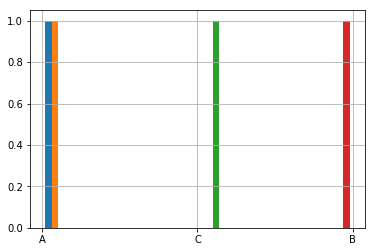

In [110]:
#Things you can quickly get from a data frame
print('columns:', df.columns)
print('data types:', df.dtypes)
df['Age'] = df['Age'].astype('Int64')
print('frequencies of feature Name:', df['Name'].value_counts())
print('average age:', df['Age'].mean())
print('varience of ages:', df['Age'].var())
df['Grade'].hist()
print('shape of data frame:', df.shape)
df['Age'].describe()

In [111]:
df

,Name,Age,Grade
10001,Jim,24,A
10002,Bob,25,A
10003,Mike,27,C
10004,Joe,50,B


In [114]:
#extract the two rows in the middle
df[['Name', 'Age']]

,Name,Age
10001,Jim,24
10002,Bob,25
10003,Mike,27
10004,Joe,50


In [116]:
df.iloc[1:3, 0:2]

,Name,Age
10002,Bob,25
10003,Mike,27


In [118]:
df.loc[10001:10003, ['Age', 'Grade']]

,Age,Grade
10001,24,A
10002,25,A
10003,27,C


In [119]:
df

,Name,Age,Grade
10001,Jim,24,A
10002,Bob,25,A
10003,Mike,27,C
10004,Joe,50,B


In [121]:
#create a new column who's value is the difference between age and the average age
df['Age Difference'] = df['Age'] - df['Age'].mean()
df

,Name,Age,Grade,Age Difference
10001,Jim,24,A,-7.5
10002,Bob,25,A,-6.5
10003,Mike,27,C,-4.5
10004,Joe,50,B,18.5


In [125]:
#create a new column called 'Passed' to detect wheather a grade is a b or above
def is_Passed(x):
    return  x == 'A' or x == 'B'
df['Passed']=  df['Grade'].apply(is_Passed)
df

,Name,Age,Grade,Age Difference,Passed
10001,Jim,24,A,-7.5,True
10002,Bob,25,A,-6.5,True
10003,Mike,27,C,-4.5,False
10004,Joe,50,B,18.5,True


In [127]:
df['Failed'] = df['Passed'].apply(lambda x : not x)
df['Failed2'] = df['Grade'].apply(lambda x : x == 'A' or x == 'B')
df

,Name,Age,Grade,Age Difference,Passed,Failed,Failed2
10001,Jim,24,A,-7.5,True,False,True
10002,Bob,25,A,-6.5,True,False,True
10003,Mike,27,C,-4.5,False,True,False
10004,Joe,50,B,18.5,True,False,True


In [ ]:
#ecersise : Load the 2018 GDP per capita data from GDP.csv as a DataFrame gdp.
#Do some data exploration

# Week 2 Homework
Please answer the first 8 questions after Chapter 1.